'''
<br><br>
@Author: Shivraj Yelave<br>
@Date: 3-10-24<br>
@Last modified by: Shivraj Yelave<br>
@Last modified time: <br>
@Title: Simple Linear Regression<br><br>
'''

### Importing Required libraries

In [117]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score


### Loading Data

In [118]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


### Analysing dataset

In [119]:
print("Shape:",train.shape)
print(train.head())
print("Shape:",test.shape)
print(test.head())



Shape: (700, 2)
      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984
Shape: (300, 2)
    x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864


In [120]:
print("Train data:",train.describe())
print("Train null values:\n",train.isna().sum())
print("Test data:",test.describe())
print("Test null values:\n",test.isna().sum())


Train data:                  x           y
count   700.000000  699.000000
mean     54.985939   49.939869
std     134.681703   29.109217
min       0.000000   -3.839981
25%      25.000000   24.929968
50%      49.000000   48.973020
75%      75.000000   74.929911
max    3530.157369  108.871618
Train null values:
 x    0
y    1
dtype: int64
Test data:                 x           y
count  300.000000  300.000000
mean    50.936667   51.205051
std     28.504286   29.071481
min      0.000000   -3.467884
25%     27.000000   25.676502
50%     53.000000   52.170557
75%     73.000000   74.303007
max    100.000000  105.591837
Test null values:
 x    0
y    0
dtype: int64


### Handling null values

In [121]:
train.dropna(inplace=True)
train.isna().sum()
train.shape

(699, 2)

### Visualizing Dataset

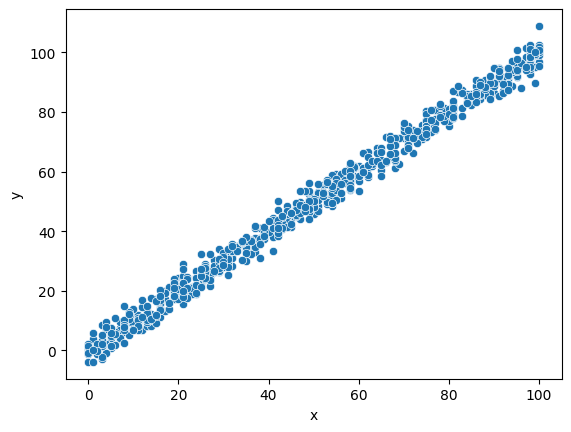

In [122]:
sns.scatterplot(x=train['x'],y = train['y'])
plt.show()

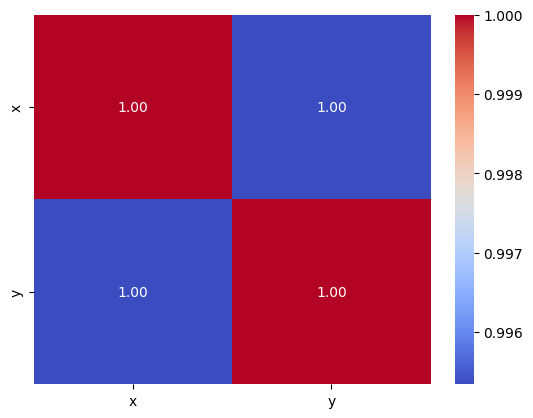

In [123]:
sns.heatmap(train.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

### Check outliers

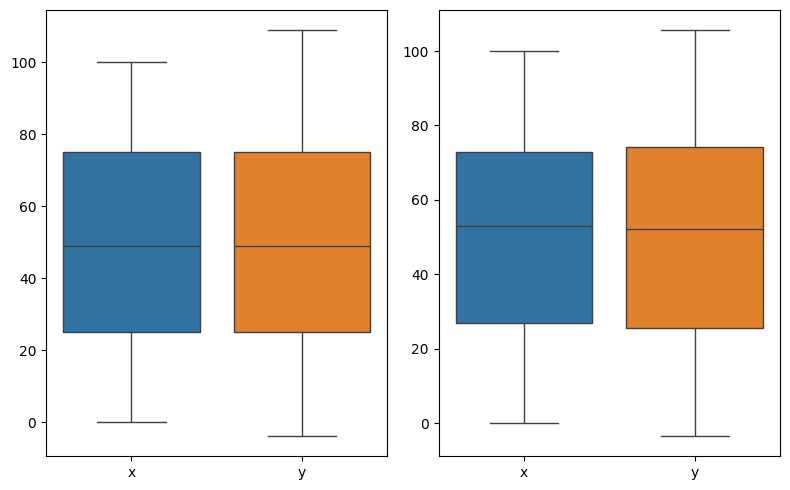

In [124]:
plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
sns.boxplot(data=train)

plt.subplot(1,2,2)
sns.boxplot(data=test)
plt.tight_layout()

plt.show()

### Spliting Dataset

In [125]:
X_train = train[['x']]  # Use double brackets to make sure it's 2D
X_test = test[['x']]    # Same for X_test
y_train = train['y']
y_test = test['y']

### Scaling Data Set

In [126]:
scalar = StandardScaler()

# Fit the scaler on X_train and transform X_train
X_train_scaled = scalar.fit_transform(X_train)
print("Scaled X_train:\n", X_train_scaled[0:5])

# Transform X_test using the same scaler
X_test_scaled = scalar.transform(X_test)
print("Scaled X_test:\n", X_test_scaled[0:5])

Scaled X_train:
 [[-8.99096176e-01]
 [-4.94443564e-04]
 [-1.21015062e+00]
 [-4.15233705e-01]
 [ 1.27828495e+00]]
Scaled X_test:
 [[ 0.93266889]
 [-1.00278099]
 [-0.96821939]
 [-1.0373426 ]
 [-0.48435691]]


### Model Selection

In [127]:
model = LinearRegression()

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred.shape

(300,)

### Model Performance

In [128]:
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

# Step 5: Print Results
print("Training MSE:", mse)

print("Testing R2:", r2)



Training MSE: 9.43292219203933
Testing R2: 0.9888014444327563


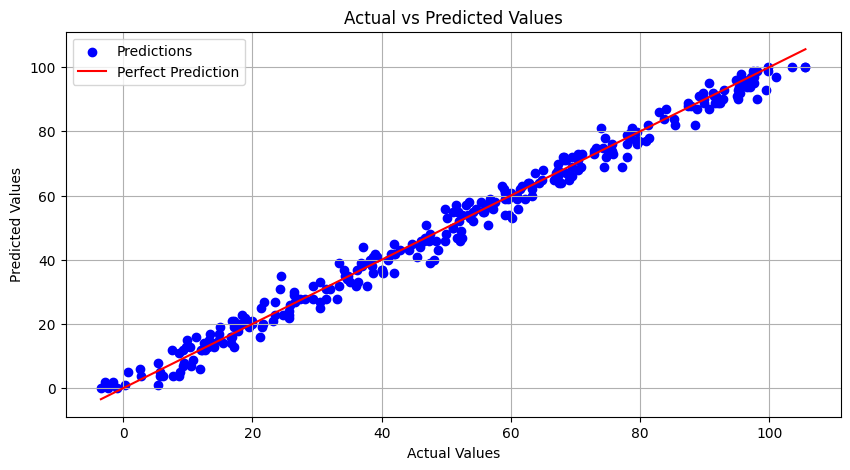

In [129]:

plt.figure(figsize=(10, 5))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', label='Perfect Prediction')  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid()
plt.show()
